# Donald Trump's Tweet analysis

by **Ragib Shahriar**

## 1.0 Identify the problem


Donal trump's posted lots of tweets. We will see which word he used most in his tweet. 

### 1.1 Identify data sources

I collected the data from twitter.com

### 1.2 Getting Started: Load libraries and set options

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re # library for regular expression operations
import string # for string operations
import numpy as np

from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ragib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ragib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('datasets/trump_old_tweets.csv')

df = data.copy()

In [3]:
df.head(5)

,date,text
0,2020-10-14 17:12:35,"RT @HerschelWalker: GEORGIA, Let's go VOTE to ..."
1,2020-10-14 14:55:48,RT @realDonaldTrump: Republicans will be provi...
2,2020-10-14 14:29:31,"Georgia, this is your chance to MAKE AMERICA G..."
3,2020-10-14 14:14:04,Fight hard Republicans. They have been taking ...
4,2020-10-14 12:52:34,https://t.co/gsFSghkmdM


In [4]:
df.tail(5)

,date,text
1944,2020-08-31 22:35:29,https://t.co/3iM1oRDEgy
1945,2020-08-31 22:20:32,Will be interviewed by Laura Ingraham (@Ingrah...
1946,2020-08-31 21:46:11,RT @WhiteHouse: LIVE: President @realDonaldTru...
1947,2020-08-31 19:03:46,"RT @TrumpWarRoom: Joe Biden: ""Covid has taken ..."
1948,2020-08-31 18:38:55,"Just watched what Biden had to say. To me, he’..."


In [5]:
df.shape

(1949, 2)

So, there are 1949 tweets in the dataset. 
Tweets from 31 August,2020 to 14 October,2020 have been collected.

## 2.0 Preprocessing

When preprocessing, you have to perform the following:

- Eliminate handles and URLs
- Tokenize the string into words. 
- Remove stop words like "and, is, a, on, etc."
- Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this. 
- Convert all your words to lower case

For example the following tweet "@YMourri and @AndrewYNg are tuning a GREAT AI model at https://deeplearning.ai!!!" after preprocessing becomes [tun,great,ai,model]

In [6]:
df_tweets = df['text']
df_tweets.head()

0    RT @HerschelWalker: GEORGIA, Let's go VOTE to ...
1    RT @realDonaldTrump: Republicans will be provi...
2    Georgia, this is your chance to MAKE AMERICA G...
3    Fight hard Republicans. They have been taking ...
4                              https://t.co/gsFSghkmdM
Name: text, dtype: object

In [7]:
all_sentences = []

for word in df_tweets:
    all_sentences.append(word)

In [8]:
print(all_sentences)

["RT @HerschelWalker: GEORGIA, Let's go VOTE to keep our Freedoms for the best country in the world! 🇺🇸🇺🇸🇺🇸@potus  #MAGA2020 #Trump2020 #KAG2…", 'RT @realDonaldTrump: Republicans will be providing far better Healthcare than the Democrats, at a far lower cost...And will always protect…', 'Georgia, this is your chance to MAKE AMERICA GREAT AGAIN. We have been strong for our Military, Vets, 2nd Amendment, and ALL. VOTE NOW!', 'Fight hard Republicans. They have been taking advantage of the system for years! https://t.co/vaToeGjrHG', 'https://t.co/gsFSghkmdM', 'RT @GaryCoby: YES! Watch... @GamebredFighter \n\n#MAGA #SuperBowl \n\nhttps://t.co/2bgAdkMFJv', 'Great night in Pennsylvania. Big and Enthusiastic Crowd. Will be back soon. VOTE!!!', 'Vote for Trump. Save your 2nd Amendment! https://t.co/QYt5K7oYws', 'RT @WAVY_News: A lawsuit seeking to extend Virginia’s voter registration deadline was filed Tuesday night after the state’s Department of E…', 'Virginia, VOTE for President Trump and sa

In [9]:
#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['RT', '@HerschelWalker:', 'GEORGIA,', "Let's", 'go', 'VOTE', 'to', 'keep', 'our', 'Freedoms', 'for', 'the', 'best', 'country', 'in', 'the', 'world!', '🇺🇸🇺🇸🇺🇸@potus', '#MAGA2020', '#Trump2020', '#KAG2…', 'RT', '@realDonaldTrump:', 'Republicans', 'will', 'be', 'providing', 'far', 'better', 'Healthcare', 'than', 'the', 'Democrats,', 'at', 'a', 'far', 'lower', 'cost...And', 'will', 'always', 'protect…', 'Georgia,', 'this', 'is', 'your', 'chance', 'to', 'MAKE', 'AMERICA', 'GREAT', 'AGAIN.', 'We', 'have', 'been', 'strong', 'for', 'our', 'Military,', 'Vets,', '2nd', 'Amendment,', 'and', 'ALL.', 'VOTE', 'NOW!', 'Fight', 'hard', 'Republicans.', 'They', 'have', 'been', 'taking', 'advantage', 'of', 'the', 'system', 'for', 'years!', 'https://t.co/vaToeGjrHG', 'https://t.co/gsFSghkmdM', 'RT', '@GaryCoby:', 'YES!', 'Watch...', '@GamebredFighter', '#MAGA', '#SuperBowl', 'https://t.co/2bgAdkMFJv', 'Great', 'night', 'in', 'Pennsylvania.', 'Big', 'and', 'Enthusiastic', 'Crowd.', 'Will', 'be', 'back', '

In [10]:
rt = ['RT']

for word in list(lines):  # iterating on a copy since removing will mess things up
    if word in rt:
        lines.remove(word)

In [11]:
lines

['@HerschelWalker:',
 'GEORGIA,',
 "Let's",
 'go',
 'VOTE',
 'to',
 'keep',
 'our',
 'Freedoms',
 'for',
 'the',
 'best',
 'country',
 'in',
 'the',
 'world!',
 '🇺🇸🇺🇸🇺🇸@potus',
 '#MAGA2020',
 '#Trump2020',
 '#KAG2…',
 '@realDonaldTrump:',
 'Republicans',
 'will',
 'be',
 'providing',
 'far',
 'better',
 'Healthcare',
 'than',
 'the',
 'Democrats,',
 'at',
 'a',
 'far',
 'lower',
 'cost...And',
 'will',
 'always',
 'protect…',
 'Georgia,',
 'this',
 'is',
 'your',
 'chance',
 'to',
 'MAKE',
 'AMERICA',
 'GREAT',
 'AGAIN.',
 'We',
 'have',
 'been',
 'strong',
 'for',
 'our',
 'Military,',
 'Vets,',
 '2nd',
 'Amendment,',
 'and',
 'ALL.',
 'VOTE',
 'NOW!',
 'Fight',
 'hard',
 'Republicans.',
 'They',
 'have',
 'been',
 'taking',
 'advantage',
 'of',
 'the',
 'system',
 'for',
 'years!',
 'https://t.co/vaToeGjrHG',
 'https://t.co/gsFSghkmdM',
 '@GaryCoby:',
 'YES!',
 'Watch...',
 '@GamebredFighter',
 '#MAGA',
 '#SuperBowl',
 'https://t.co/2bgAdkMFJv',
 'Great',
 'night',
 'in',
 'Pennsylva

In [12]:
#Removing Punctuation

tweets = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

tweets2 = []

for word in tweets:
    if word != '':
        tweets2.append(word)

In [13]:
tweets2

['HerschelWalker',
 'GEORGIA',
 'Lets',
 'go',
 'VOTE',
 'to',
 'keep',
 'our',
 'Freedoms',
 'for',
 'the',
 'best',
 'country',
 'in',
 'the',
 'world',
 'potus',
 'MAGA2020',
 'Trump2020',
 'KAG2',
 'realDonaldTrump',
 'Republicans',
 'will',
 'be',
 'providing',
 'far',
 'better',
 'Healthcare',
 'than',
 'the',
 'Democrats',
 'at',
 'a',
 'far',
 'lower',
 'costAnd',
 'will',
 'always',
 'protect',
 'Georgia',
 'this',
 'is',
 'your',
 'chance',
 'to',
 'MAKE',
 'AMERICA',
 'GREAT',
 'AGAIN',
 'We',
 'have',
 'been',
 'strong',
 'for',
 'our',
 'Military',
 'Vets',
 '2nd',
 'Amendment',
 'and',
 'ALL',
 'VOTE',
 'NOW',
 'Fight',
 'hard',
 'Republicans',
 'They',
 'have',
 'been',
 'taking',
 'advantage',
 'of',
 'the',
 'system',
 'for',
 'years',
 'httpstcovaToeGjrHG',
 'httpstcogsFSghkmdM',
 'GaryCoby',
 'YES',
 'Watch',
 'GamebredFighter',
 'MAGA',
 'SuperBowl',
 'httpstco2bgAdkMFJv',
 'Great',
 'night',
 'in',
 'Pennsylvania',
 'Big',
 'and',
 'Enthusiastic',
 'Crowd',
 'Will'

In [14]:

#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in tweets2:
    stem.append(s_stemmer.stem(word))
    
stem

['herschelwalk',
 'georgia',
 'let',
 'go',
 'vote',
 'to',
 'keep',
 'our',
 'freedom',
 'for',
 'the',
 'best',
 'countri',
 'in',
 'the',
 'world',
 'potus',
 'maga2020',
 'trump2020',
 'kag2',
 'realdonaldtrump',
 'republican',
 'will',
 'be',
 'provid',
 'far',
 'better',
 'healthcar',
 'than',
 'the',
 'democrat',
 'at',
 'a',
 'far',
 'lower',
 'costand',
 'will',
 'alway',
 'protect',
 'georgia',
 'this',
 'is',
 'your',
 'chanc',
 'to',
 'make',
 'america',
 'great',
 'again',
 'we',
 'have',
 'been',
 'strong',
 'for',
 'our',
 'militari',
 'vet',
 '2nd',
 'amend',
 'and',
 'all',
 'vote',
 'now',
 'fight',
 'hard',
 'republican',
 'they',
 'have',
 'been',
 'take',
 'advantag',
 'of',
 'the',
 'system',
 'for',
 'year',
 'httpstcovatoegjrhg',
 'httpstcogsfsghkmdm',
 'garycobi',
 'yes',
 'watch',
 'gamebredfight',
 'maga',
 'superbowl',
 'httpstco2bgadkmfjv',
 'great',
 'night',
 'in',
 'pennsylvania',
 'big',
 'and',
 'enthusiast',
 'crowd',
 'will',
 'be',
 'back',
 'soon',

In [15]:
len(stem)

37206

In [16]:
#Removing all Stop Words

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

stem2 = []

for word in stem:
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        stem2.append(word)

stem2

['herschelwalk',
 'georgia',
 'let',
 'go',
 'vote',
 'keep',
 'freedom',
 'best',
 'countri',
 'world',
 'potus',
 'maga2020',
 'trump2020',
 'kag2',
 'realdonaldtrump',
 'republican',
 'provid',
 'far',
 'better',
 'healthcar',
 'democrat',
 'far',
 'lower',
 'costand',
 'alway',
 'protect',
 'georgia',
 'chanc',
 'make',
 'america',
 'great',
 'strong',
 'militari',
 'vet',
 '2nd',
 'amend',
 'vote',
 'fight',
 'hard',
 'republican',
 'take',
 'advantag',
 'system',
 'year',
 'httpstcovatoegjrhg',
 'httpstcogsfsghkmdm',
 'garycobi',
 'yes',
 'watch',
 'gamebredfight',
 'maga',
 'superbowl',
 'httpstco2bgadkmfjv',
 'great',
 'night',
 'pennsylvania',
 'big',
 'enthusiast',
 'crowd',
 'back',
 'soon',
 'vote',
 'vote',
 'trump',
 'save',
 '2nd',
 'amend',
 'httpstcoqyt5k7oyw',
 'wavynew',
 'lawsuit',
 'seek',
 'extend',
 'virginia',
 'voter',
 'registr',
 'deadlin',
 'file',
 'tuesday',
 'night',
 'state',
 'depart',
 'e',
 'virginia',
 'vote',
 'presid',
 'trump',
 'save',
 'sieg',
 

In [17]:
len(stem2)

23196

In [18]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [19]:
df.head(20)

biden              251
trump              212
presid             207
realdonaldtrump    191
amp                174
vote               170
great              169
joe                160
thank              126
democrat           119
peopl              118
elect              106
news                97
state               93
get                 92
go                  92
american            88
win                 86
job                 85
new                 84
Name: 0, dtype: int64

In [20]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 2904, 2: 699, 3: 346, 4: 243, 5: 181, 6: 112, 7: 77, 8: 68, 9: 67, 10: 50, ...})

In [21]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

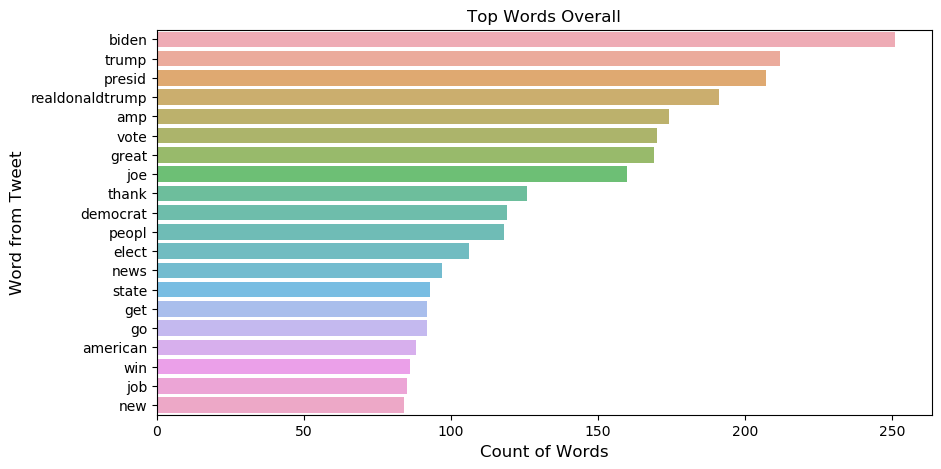

In [22]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [23]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [24]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [25]:
str1 = " " 
stem2 = str1.join(tweets2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

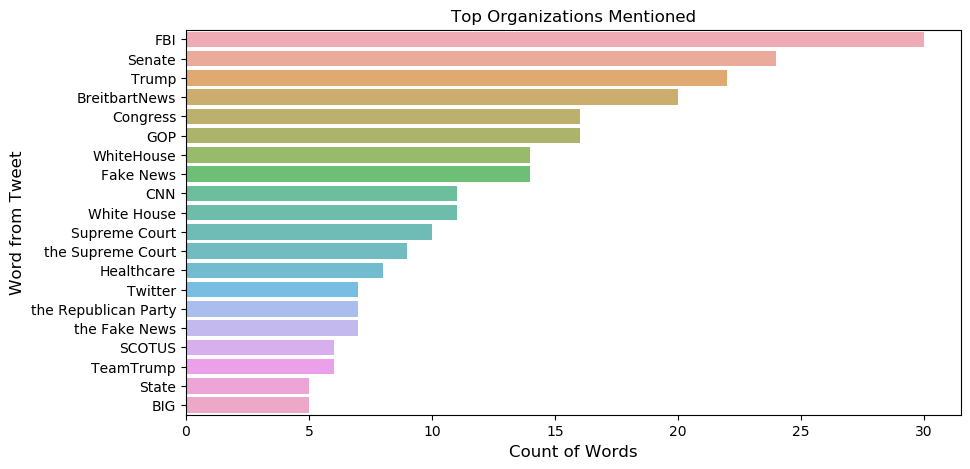

In [26]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
str1 = " " 
stem2 = str1.join(tweets2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

In [ ]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()